In [1]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Setting up the parameters

In [2]:
sigma = 0.1
a = 0.1
timestep = 12
length = 1 # in years
day_count = ql.Thirty360()
todays_date = ql.Date(1, 9, 2021)

In [3]:
ql.Settings.instance().evaluationDate = todays_date

dates = [ql.Date(2,9,2021), ql.Date(4,10,2021), 
         ql.Date(2,11,2021), ql.Date(2,12,2021),
         ql.Date(3,1,2022), ql.Date(2,2,2022),
         ql.Date(2,3,2022), ql.Date(4,4,2022),
         ql.Date(2,5,2022), ql.Date(2,6,2022),
         ql.Date(4,7,2022), ql.Date(2,8,2022),
         ql.Date(2,9,2022)]
rates = [0.0009, 0.0008, 0.0010, 0.0013,
          0.0015, 0.0015, 0.0013, 0.0011,
          0.0010, 0.0012, 0.0014, 0.0016, 0.0020]

spot_curve = ql.ForwardCurve(dates, rates, ql.Actual360())
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

Generating HullWhite process

In [4]:
hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)

In [5]:
def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

We will first illustrate 10 paths for this process

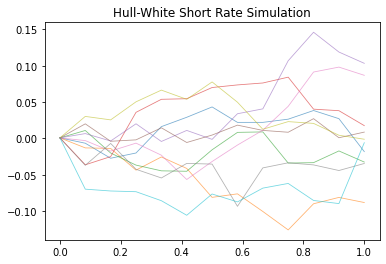

In [6]:
num_paths = 10
time, paths = generate_paths(num_paths, timestep)
for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()

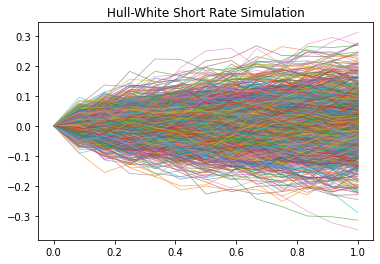

In [12]:
num_paths = 1000
time, paths = generate_paths(num_paths, timestep)
for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()

Text(0.5, 1.0, 'Variance of Short Rates')

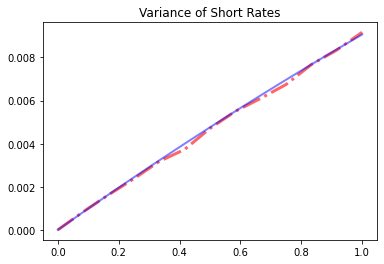

In [8]:
vol = [np.var(paths[:, i]) for i in range(timestep+1)]
plt.plot(time, vol, "r-.", lw=3, alpha=0.6)
plt.plot(time,sigma*sigma/(2*a)*(1.0-np.exp(-2.0*a*np.array(time))), "b-", lw=2, alpha=0.5)
plt.title("Variance of Short Rates")

In [9]:
vol

[4.70197740328915e-38,
 0.0008418865627098102,
 0.001626843627249761,
 0.0023725864607393003,
 0.003176661743512717,
 0.0037310219191003134,
 0.00470706579725786,
 0.0055002042627402365,
 0.006102375057336321,
 0.00674612601551296,
 0.007672405099554909,
 0.008342664477438574,
 0.009167982075932677]

### References
* "Hull White Term Structure Simulations with QuantLib Python", Goutham Balaraman, http://gouthamanbalaraman.com/blog/hull-white-simulation-quantlib-python.html 